## 통계학 실험 8장 과제 

In [1]:
import gzip
import numpy as np
import pandas as pd
from scipy.stats import t as tdist, pearsonr
from statsmodels.formula.api import ols
from statsmodels.api import stats
from statsmodels.graphics.gofplots import ProbPlot
import seaborn
from matplotlib import pyplot as plt
from IPython.display import Markdown as md

#### 예제 1. (handspan.txt) 다음은 167명의 학생들에 대해 성별(Sex)과 신장(Height) 그리고 손 한뼘의 길이(HandSpan)를 측정한 자료이다. 

In [2]:
(data := pd.read_csv(gzip.open('handspan.txt.gz'), sep='\t'))

,Sex,Height,HandSpan
0,Female,68.0,21.5
1,Male,71.0,23.5
2,Male,73.0,22.5
3,Female,64.0,18.0
4,Male,68.0,23.5
...,...,...,...
162,Female,60.0,17.0
163,Male,73.0,23.0
164,Female,66.0,18.5
165,Female,68.0,21.0


(1) 신장과 손 한뼘의 길이는 서로 상관관계가 존재하는가? 표본 상관계수를 구하고 두 변수의 산점도를 그려보자. 두 변수 사이에 선형적 연관성이 존재하는가?

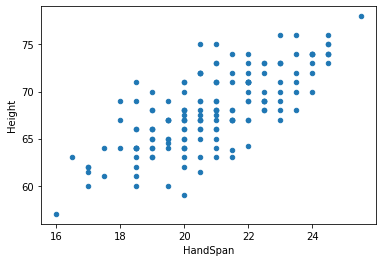


**상관계수 : 0.7395375015506629**

선형적 연관성이 아마도 존재하는 것 같다.

&nbsp;


In [3]:
data.plot.scatter('HandSpan', 'Height', c='#1F77B4', figsize=(6, 4))
plt.show()

md(rf'''
**상관계수 : {data.corr().HandSpan.Height}**

선형적 연관성이 아마도 존재하는 것 같다.

&nbsp;
''')

(2) 신장과 손 한뼘의 길이사이에 상관관계가 존재하는지 유의수준 5%에서 검정하여라. 

In [4]:
r, p = pearsonr(data.HandSpan, data.Height)
t = (len(data) - 2)**0.5 * r / (1 - r**2)**0.5

md(fr'''
상관분석을 통해 상관관계의 유무를 검정해보자.

- 가정: handspan.txt는 이변량정규모집단에서 추출한 표본이다.
- 가설:
  - $H_0 : \rho = 0$
  - $H_1 : \rho \neq 0$
- 검정:
  - 검정통계량 $T = \sqrt{{n - 2}} \dfrac{{r}}{{\sqrt{{1 - r^2}}}}$
  - $t = {t}$
  - $P = {p}$

유의확률이 5%보다 작으므로 $H_0$는 기각, 신장과 손 한뼘 사이에는 유의한 상관관계가 존재한다.

&nbsp;
''')


상관분석을 통해 상관관계의 유무를 검정해보자.

- 가정: handspan.txt는 이변량정규모집단에서 추출한 표본이다.
- 가설:
  - $H_0 : \rho = 0$
  - $H_1 : \rho \neq 0$
- 검정:
  - 검정통계량 $T = \sqrt{n - 2} \dfrac{r}{\sqrt{1 - r^2}}$
  - $t = 14.112783358124402$
  - $P = 3.5993040590359566e-30$

유의확률이 5%보다 작으므로 $H_0$는 기각, 신장과 손 한뼘 사이에는 유의한 상관관계가 존재한다.

&nbsp;


(3) 신장(y)과 손 한뼘의 길이(x)에 대해 단순선형회귀모형을 적용해보자. 추정된 회귀식을 구하고 유의수준 5%에서 회귀 직선의 유의성을 검정하시오. 

In [5]:
model = ols('Height ~ HandSpan', data).fit()
alpha, beta = model.params
f = model.fvalue
p = model.f_pvalue
rr = model.rsquared

display(md(r'''
회귀직선을 먼저 구해보자.

- 단순선형회귀모형: $Y_i = \alpha + \beta x_i + e_i \;  (i=1, 2, ..., n)$
- 가정:
  1.  선형성: $E(e_i) = 0$, 즉 $E(Y_i|x_i) = \alpha + \beta x_i$
  2.  등분산성: $Var(e_1) = Var(e_2) = ... = Var(e_n) = \sigma^2 > 0$
  3.  독립성: $e_1, e_2, ..., e_n은 서로 독립$
- 제곱합인 $ \displaystyle\sum_{i=1}^{n}(Y_i - (\alpha + \beta x_i))^2 $이 최소가 되는 직선은 아래와 같다.
''' + rf'''
  - $\hat\beta = \dfrac{{S_{{XY}}}}{{S_{{XX}}}}={beta}$
  - $\hat\alpha = \overline y - \hat \beta x = {alpha}$
  - $\hat y = \hat\alpha + \hat\beta x = {alpha} + {beta} x$
''' + r'''

위 회귀직선의 유의성을 검정해보자.

- 단순선형회귀모형: $Y_i = \alpha + \beta x_i + e_i \;  (i=1, 2, ..., n)$
- 가정:
  1.  선형성: $E(e_i) = 0$, 즉 $E(Y_i|x_i) = \alpha + \beta x_i$
  2.  등분산성: $Var(e_1) = Var(e_2) = ... = Var(e_n) = \sigma^2 > 0$
  3.  독립성: $e_1, e_2, ..., e_n은 서로 독립$
  4.  정규성: $e_i \sim N(0, \sigma^2)$
  - ($e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 로 요약 가능)
- 가설:
  - $H_0 : \beta = 0$
  - $H_1 : \beta \neq 0$
- 분산분석표:
'''))
        
display(stats.anova_lm(model))
        
md(rf'''
유의확률이 5%보다 낮아 $H_0$ 기각, 회귀직선이 유의하다고 볼 수 있다.

$R^2 = {rr}$ 이므로, 회귀직선이 전체 자료의 산포 중 {rr*100:.04}%를 설명해준다.

&nbsp;

''')

## 아래는 연습코드. statsmodels 패키지를 사용한것과 같은 결과가 나온다.
#
# X = data.HandSpan
# Y = data.Height
# S_XX = ((X - X.mean())**2).sum()
# S_YY = ((Y - Y.mean())**2).sum()
# S_XY = ((X - X.mean())*(Y - Y.mean())).sum()
# SSR = S_XY*S_XY/S_XX
# SSE = S_YY - S_XY*S_XY/S_XX
# SST = S_YY
# MSR = SSR/1
# MSE = SSE/(n-2)
# f = MSR/MSE
#
# 요인 | 제곱합 | 자유도 | 평균제곱 | F값
# -----|--------|--------|----------|-----
# 회귀 | {SSR}  | 1      | {MSR}    | {f}
# 잔차 | {SSE}  | {n-2}  | {MSE}
# 계   | {SST}  | {n-1}  |


회귀직선을 먼저 구해보자.

- 단순선형회귀모형: $Y_i = \alpha + \beta x_i + e_i \;  (i=1, 2, ..., n)$
- 가정:
  1.  선형성: $E(e_i) = 0$, 즉 $E(Y_i|x_i) = \alpha + \beta x_i$
  2.  등분산성: $Var(e_1) = Var(e_2) = ... = Var(e_n) = \sigma^2 > 0$
  3.  독립성: $e_1, e_2, ..., e_n은 서로 독립$
- 제곱합인 $ \displaystyle\sum_{i=1}^{n}(Y_i - (\alpha + \beta x_i))^2 $이 최소가 되는 직선은 아래와 같다.

  - $\hat\beta = \dfrac{S_{XY}}{S_{XX}}=1.560079910616697$
  - $\hat\alpha = \overline y - \hat \beta x = 35.525039469529524$
  - $\hat y = \hat\alpha + \hat\beta x = 35.525039469529524 + 1.560079910616697 x$


위 회귀직선의 유의성을 검정해보자.

- 단순선형회귀모형: $Y_i = \alpha + \beta x_i + e_i \;  (i=1, 2, ..., n)$
- 가정:
  1.  선형성: $E(e_i) = 0$, 즉 $E(Y_i|x_i) = \alpha + \beta x_i$
  2.  등분산성: $Var(e_1) = Var(e_2) = ... = Var(e_n) = \sigma^2 > 0$
  3.  독립성: $e_1, e_2, ..., e_n은 서로 독립$
  4.  정규성: $e_i \sim N(0, \sigma^2)$
  - ($e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 로 요약 가능)
- 가설:
  - $H_0 : \beta = 0$
  - $H_1 : \beta \neq 0$
- 분산분석표:


,df,sum_sq,mean_sq,F,PR(>F)
HandSpan,1.0,1500.060040,1500.060040,199.170654,3.599304e-30
Residual,165.0,1242.702685,7.531531,NaN,NaN



유의확률이 5%보다 낮아 $H_0$ 기각, 회귀직선이 유의하다고 볼 수 있다.

$R^2 = 0.546915716199797$ 이므로, 회귀직선이 전체 자료의 산포 중 54.69%를 설명해준다.

&nbsp;



(4) 단순선형회귀모형의 적용은 타당한가? 잔차도를 이용하여 답하시오.


$e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정이 타당한지 확인하기 위해, 잔차도를 그려 잔차분석을 해보자.


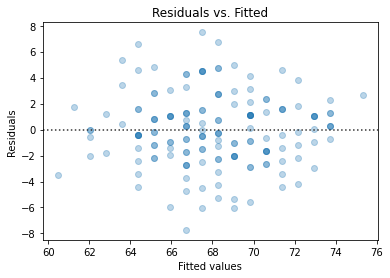

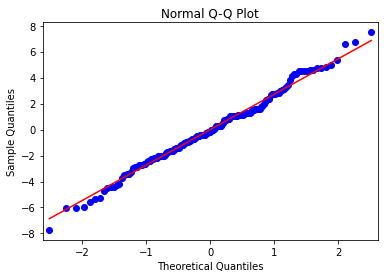


스튜던트화된 잔차들이: 
- 대략 0에 대해 대칭이며
- 설명변수(X축)에 따른 잔차의 산포가 크게 다르지 않고
- 점들이 특별한 형태를 띄지 않고있다.
- 정규 분위수 그래프를 그렸을 때, 잔차가 정규분포와 크게 다르지 않다.

$e_i \overset{	ext{iid}}{\sim} N(0, \sigma^2)$ 가정에 큰 문제가 없어보이므로, 단순선형회귀모형의 적용은 타당하다.

&nbsp;


In [6]:
display(md(r'''
$e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정이 타당한지 확인하기 위해, 잔차도를 그려 잔차분석을 해보자.
'''))

# Y_i = \hat y + \hat e
f = model.fittedvalues # \hat y
r = model.resid # \hat e

seaborn.residplot(x=f, y=r, data=data, scatter_kws={'alpha':0.3})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted values")
plt.show()

ProbPlot(r).qqplot(line='s', lw=1, fmt='b')
plt.title("Normal Q-Q Plot")
plt.show()

md('''
스튜던트화된 잔차들이: 
- 대략 0에 대해 대칭이며
- 설명변수(X축)에 따른 잔차의 산포가 크게 다르지 않고
- 점들이 특별한 형태를 띄지 않고있다.
- 정규 분위수 그래프를 그렸을 때, 잔차가 정규분포와 크게 다르지 않다.

$e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정에 큰 문제가 없어보이므로, 단순선형회귀모형의 적용은 타당하다.

&nbsp;
''')

#### 예제 2. (carstopping.txt) 주어진 자료는 브레이크가 작동되는 순간의 자동차의 주행 속도 (Speed)에 따른 자동차 제동 거리(StopDist)를 조사한 자료이다. 

In [7]:
(data2 := pd.read_csv(gzip.open('carstopping.txt.gz'), sep='\t'))

,StopDist,Speed
0,4,4
1,2,5
2,8,5
3,8,5
4,4,5
...,...,...
58,107,35
59,79,36
60,138,39
61,110,40


(1) 자동차의 주행 속도에 따른 자동차의 제동거리 간에는 서로 상관관계가 존재하는가? 상관 분석을 통해 이를 확인해보자. 

In [8]:
r, p = pearsonr(data2.StopDist, data2.Speed)
t = (len(data) - 2)**0.5 * r / (1 - r**2)**0.5

md(fr'''
자동차의 주행속도와 자동차의 제동거리의 상관계수는 {r}이다. 상관분석을 통해 이 상관계수가 얼마나 유의한지, 상관관계의 유무를 검정해보자.

- 가정: carstopping.txt는 이변량정규모집단에서 추출한 표본이다.
- 가설:
  - $H_0 : \rho = 0$
  - $H_1 : \rho \neq 0$
- 검정:
  - 검정통계량 $T = \sqrt{{n - 2}} \dfrac{{r}}{{\sqrt{{1 - r^2}}}}$
  - $t = {t}$
  - $P = {p}$

유의확률이 5%보다 작으므로 $H_0$는 기각, 자동차의 주행속도와 자동차의 제동거리 사이에는 유의한 상관관계가 존재한다.

&nbsp;
''')


자동차의 주행속도와 자동차의 제동거리의 상관계수는 0.9355036785004627이다. 상관분석을 통해 이 상관계수가 얼마나 유의한지, 상관관계의 유무를 검정해보자.

- 가정: carstopping.txt는 이변량정규모집단에서 추출한 표본이다.
- 가설:
  - $H_0 : \rho = 0$
  - $H_1 : \rho \neq 0$
- 검정:
  - 검정통계량 $T = \sqrt{n - 2} \dfrac{r}{\sqrt{1 - r^2}}$
  - $t = 34.01128168761269$
  - $P = 2.975121583729983e-29$

유의확률이 5%보다 작으므로 $H_0$는 기각, 자동차의 주행속도와 자동차의 제동거리 사이에는 유의한 상관관계가 존재한다.

&nbsp;


(2) 주어진 자료에 단순 선형회귀모형을 적용한 후 결과를 확인해 보자. 유의수준 5%에서 모형은 유의한가? 

In [9]:
model2 = ols('StopDist ~ Speed', data2).fit()
alpha, beta = model2.params
f = model2.fvalue
p = model2.f_pvalue
rr = model2.rsquared

display(md(r'''
- 단순선형회귀모형: $Y_i = \alpha + \beta x_i + e_i \;  (i=1, 2, ..., n)$
- 가정: $e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ (선형성, 등분산성, 독립성, 정규성)
- 적합된 회귀직선:''' + fr'''
  - $\hat y = {alpha} + {beta} x$
- 가설:
  - $H_0 : \beta = 0$
  - $H_1 : \beta \neq 0$
- 분산분석표:
'''))

display(stats.anova_lm(model2))

md(f'''
유의확률이 5%보다 작아 $H_0$ 기각, 회귀직선이 유의하다고 볼 수 있다.

$R^2 = {rr}$ 이므로, 회귀직선이 전체 자료의 산포 중 {rr*100:.04}%를 설명해준다.

&nbsp;
''')


- 단순선형회귀모형: $Y_i = \alpha + \beta x_i + e_i \;  (i=1, 2, ..., n)$
- 가정: $e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ (선형성, 등분산성, 독립성, 정규성)
- 적합된 회귀직선:
  - $\hat y = -20.27341635367925 + 3.1365901508634266 x$
- 가설:
  - $H_0 : \beta = 0$
  - $H_1 : \beta \neq 0$
- 분산분석표:


,df,sum_sq,mean_sq,F,PR(>F)
Speed,1.0,59540.148284,59540.148284,427.653359,2.975122e-29
Residual,61.0,8492.740605,139.225256,NaN,NaN



유의확률이 5%보다 작아 $H_0$ 기각, 회귀직선이 유의하다고 볼 수 있다.

$R^2 = 0.875167132487897$ 이므로, 회귀직선이 전체 자료의 산포 중 87.52%를 설명해준다.

&nbsp;


(3) 적합된 회귀 모형의 잔차도를 확인해 보자. 단순선형회귀모형의 적용이 타당하다고 볼 수 있는가? 


$e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정이 타당한지 확인하기 위해, 잔차도를 그려 잔차분석을 해보자.


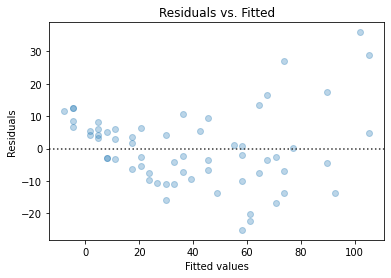

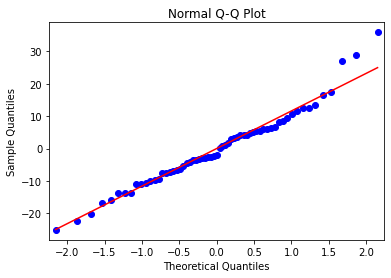


잔차의 산포가 X축이 0에 가까울수록 작고, X축이 커질수록 커지는 모습을 보인다. $e_i \overset{	ext{iid}}{\sim} N(0, \sigma^2)$ 가정을 하기 곤란해보이므로, 단순선형회귀모형을 적용시키면 안되는 사례로 보인다.

&nbsp;


In [10]:
display(md(r'''
$e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정이 타당한지 확인하기 위해, 잔차도를 그려 잔차분석을 해보자.
'''))

# Y_i = \hat y + \hat e
f = model2.fittedvalues # \hat y
r = model2.resid # \hat e

seaborn.residplot(x=f, y=r, data=data, scatter_kws={'alpha':0.3})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted values")
plt.show()

ProbPlot(r).qqplot(line='s', lw=1, fmt='b')
plt.title("Normal Q-Q Plot")
plt.show()

md('''
잔차의 산포가 X축이 0에 가까울수록 작고, X축이 커질수록 커지는 모습을 보인다. $e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정을 하기 곤란해보이므로, 단순선형회귀모형을 적용시키면 안되는 사례로 보인다.

&nbsp;
''')

(4) 자동차의 주행속도와 자동차의 제동거리 사이의 산점도를 확인해보자. 두 변수 사이에는 곡률(curvature)관계가 존재하며, 또한 x 값이 증가함에 따라 y값의 산포가 증가하는 것을 확인할 수 있다. 따라서 주어진 자료에 대해서는 단순 선형회귀 모형의 적용이 적절하지 않다. 이러한 문제를 해결하기 위한 방법 중 하나는 반응변수에 적절한 함수 변환(transformation) 을 취하는 것이다. 즉, 반응변수에 제곱근을 취한 새로운 변수(sqrt.dist)를 만든 후, 새로운 변수 sqrt.dist와 주행속도(Speed)의 산점도를 다시 한번 그려보자. 새로운 산점도는 어떠한 형태를 보이고 있는가? 

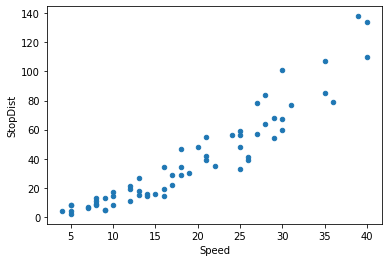

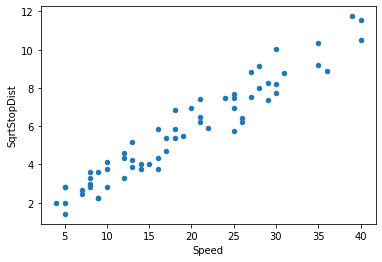


새로운 산점도는 선형이다.

&nbsp;


In [11]:
data2.plot.scatter('Speed', 'StopDist', c='#1F77B4', figsize=(6, 4))
plt.show()

data2['SqrtStopDist'] = data2.StopDist**0.5

data2.plot.scatter('Speed', 'SqrtStopDist', c='#1F77B4', figsize=(6, 4))
plt.show()

md('''
새로운 산점도는 선형이다.

&nbsp;
''')

(5) 새로운 변수 sqrt.dist와 Speed에 대해 단순선형회귀모형을 적합시킨 후 결과를 확인해 보자. 새로운 모형의 결정계수 $R^2$값은 얼마인가? (1)번에서 구한 모형의 결정계수 값과 비교 해보시오. 

In [12]:
model2 = ols('SqrtStopDist ~ Speed', data2).fit()
alpha, beta = model2.params
f = model2.fvalue
p = model2.f_pvalue
rr = model2.rsquared

display(md(r'''
- 단순선형회귀모형: $Y_i = \alpha + \beta x_i + e_i \;  (i=1, 2, ..., n)$
- 가정: $e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ (선형성, 등분산성, 독립성, 정규성)
- 적합된 회귀직선:''' + fr'''
  - $\hat y = {alpha} + {beta} x$
- 가설:
  - $H_0 : \beta = 0$
  - $H_1 : \beta \neq 0$
- 분산분석표:
'''))

display(stats.anova_lm(model2))

md(f'''
유의확률이 5%보다 작아 $H_0$ 기각, 회귀직선이 유의하다고 볼 수 있다.

$R^2 = {rr}$ 이므로, 회귀직선이 전체 자료의 산포 중 {rr*100:.04}%를 설명해준다.

&nbsp;
''')


- 단순선형회귀모형: $Y_i = \alpha + \beta x_i + e_i \;  (i=1, 2, ..., n)$
- 가정: $e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ (선형성, 등분산성, 독립성, 정규성)
- 적합된 회귀직선:
  - $\hat y = 0.9182834317156159 + 0.2525682905708346 x$
- 가설:
  - $H_0 : \beta = 0$
  - $H_1 : \beta \neq 0$
- 분산분석표:


,df,sum_sq,mean_sq,F,PR(>F)
Speed,1.0,386.057517,386.057517,746.221738,6.505402e-36
Residual,61.0,31.558326,0.517350,NaN,NaN



유의확률이 5%보다 작아 $H_0$ 기각, 회귀직선이 유의하다고 볼 수 있다.

$R^2 = 0.9244321638474889$ 이므로, 회귀직선이 전체 자료의 산포 중 92.44%를 설명해준다.

&nbsp;


(6) 새로운 모형의 잔차도를 확인해보자. 단순선형회귀모형의 적용이 타당하다고 볼 수 있는가?


$e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정이 타당한지 확인하기 위해, 잔차도를 그려 잔차분석을 해보자.


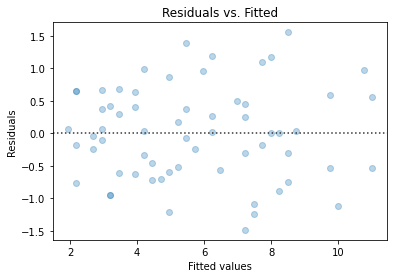

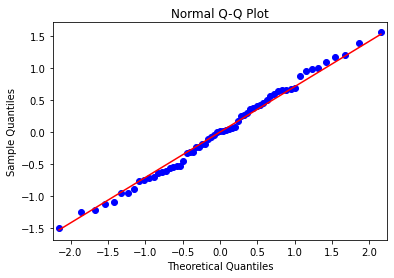


스튜던트화된 잔차들이: 
- 대략 0에 대해 대칭이며
- 설명변수(X축)에 따른 잔차의 산포가 크게 다르지 않고
- 점들이 특별한 형태를 띄지 않고있다.
- 정규 분위수 그래프를 그렸을 때, 잔차가 정규분포와 크게 다르지 않다.

$e_i \overset{	ext{iid}}{\sim} N(0, \sigma^2)$ 가정에 큰 문제가 없어보이므로, 단순선형회귀모형의 적용은 타당하다.

&nbsp;


In [13]:
display(md(r'''
$e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정이 타당한지 확인하기 위해, 잔차도를 그려 잔차분석을 해보자.
'''))

# Y_i = \hat y + \hat e
f = model2.fittedvalues # \hat y
r = model2.resid # \hat e

seaborn.residplot(x=f, y=r, data=data, scatter_kws={'alpha':0.3})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted values")
plt.show()

ProbPlot(r).qqplot(line='s', lw=1, fmt='b')
plt.title("Normal Q-Q Plot")
plt.show()

md('''
스튜던트화된 잔차들이: 
- 대략 0에 대해 대칭이며
- 설명변수(X축)에 따른 잔차의 산포가 크게 다르지 않고
- 점들이 특별한 형태를 띄지 않고있다.
- 정규 분위수 그래프를 그렸을 때, 잔차가 정규분포와 크게 다르지 않다.

$e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정에 큰 문제가 없어보이므로, 단순선형회귀모형의 적용은 타당하다.

&nbsp;
''')

#### 예제 3. (hospital.txt) 다음은 미국 내 113개의 병원들을 대상으로 입원 기간 동안 환자들이 받는 감염 위험과 관련된 사항들을 조사하였다. 다음은 주요 변수에 대한 설명이다.

- InfctRsk: 종속변수. 감염 위험 정도

- Stay: 설명변수1. 환자들의 평균 입원 기간 

- Age: 설명변수2. 환자들의 평균 나이 

- Xray: 설명변수3. 해당 병원의 X-ray 검진 횟수

In [14]:
(data3 := pd.read_csv(gzip.open('hospital.txt.gz'), sep='\t')[['InfctRsk', 'Stay', 'Age', 'Xray']])

,InfctRsk,Stay,Age,Xray
0,4.1,7.13,55.7,39.6
1,1.6,8.82,58.2,51.7
2,2.7,8.34,56.9,74.0
3,5.6,8.95,53.7,122.8
4,5.7,11.20,56.5,88.9
...,...,...,...,...
108,5.7,11.80,53.8,116.9
109,5.8,9.50,49.3,70.9
110,4.4,7.70,56.9,67.9
111,5.9,17.94,56.2,91.8


(1) 종속변수와 각 설명변수들 간에는 유의한 상관관계가 존재하는가? 산점도와 상관분석을 통해 이를 확인해보시오.

,InfctRsk,Stay,Age,Xray
InfctRsk,1.000000,0.533444,0.001093,0.453392
Stay,0.533444,1.000000,0.188914,0.382482
Age,0.001093,0.188914,1.000000,-0.018855
Xray,0.453392,0.382482,-0.018855,1.000000


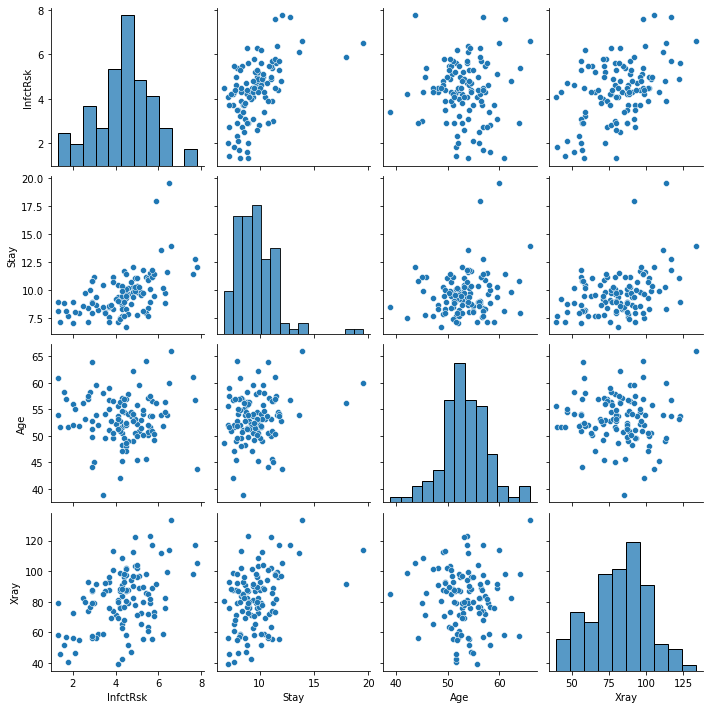

In [15]:
seaborn.pairplot(data=data3)
plt.plot()

data3.corr()

In [16]:
r1, p1 = pearsonr(data3.InfctRsk, data3.Stay)
r2, p2 = pearsonr(data3.InfctRsk, data3.Age)
r3, p3 = pearsonr(data3.InfctRsk, data3.Xray)
t = lambda r: (len(data) - 2)**0.5 * r / (1 - r**2)**0.5

md(r'''
상관분석을 통해 상관관계의 유무를 검정해보자.

- 가정: hospital.txt는 정규모집단에서 추출한 표본이다.
- 가설:
  - $H_{01} : \rho_1 = 0 \; vs \; H_{11} : \rho_1 \neq 0$
  - $H_{02} : \rho_2 = 0 \; vs \; H_{12} : \rho_2 \neq 0$
  - $H_{03} : \rho_3 = 0 \; vs \; H_{13} : \rho_3 \neq 0$
- 검정:
  - 검정통계량 $T = \sqrt{n - 2} \dfrac{r}{\sqrt{1 - r^2}}$ ''' + fr'''
  - $t_1 = {t(r1)}, P_1 = {p1}$
  - $t_2 = {t(r2)}, P_2 = {p2}$
  - $t_3 = {t(r3)}, P_3 = {p3}$ ''' + r'''
- 결과
  - $H_{00}$ 기각, 감염 위험 정도와 입원기간 사이에는 유의한 상관관계가 존재한다.
  - $H_{01}$ 채택, 감염 위험 정도와 나이 사이에는 유의한 상관관계가 존재하지 않는다.
  - $H_{02}$ 기각, 감염 위험 정도와 X-ray 검진 횟수 사이에는 유의한 상관관계가 존재한다.

&nbsp;
''')


상관분석을 통해 상관관계의 유무를 검정해보자.

- 가정: hospital.txt는 정규모집단에서 추출한 표본이다.
- 가설:
  - $H_{01} : \rho_1 = 0 \; vs \; H_{11} : \rho_1 \neq 0$
  - $H_{02} : \rho_2 = 0 \; vs \; H_{12} : \rho_2 \neq 0$
  - $H_{03} : \rho_3 = 0 \; vs \; H_{13} : \rho_3 \neq 0$
- 검정:
  - 검정통계량 $T = \sqrt{n - 2} \dfrac{r}{\sqrt{1 - r^2}}$ 
  - $t_1 = 8.101114392086105, P_1 = 1.1769611863413603e-09$
  - $t_2 = 0.014041981816864488, P_2 = 0.99083146029816$
  - $t_3 = 6.534102099044914, P_3 = 4.584845452365122e-07$ 
- 결과
  - $H_{00}$ 기각, 감염 위험 정도와 입원기간 사이에는 유의한 상관관계가 존재한다.
  - $H_{01}$ 채택, 감염 위험 정도와 나이 사이에는 유의한 상관관계가 존재하지 않는다.
  - $H_{02}$ 기각, 감염 위험 정도와 X-ray 검진 횟수 사이에는 유의한 상관관계가 존재한다.

&nbsp;


(2) 주어진 자료에 다중선형회귀모형을 적용해보자. 유의수준 5%에서 모형은 유의하다고 할 수 있는가? 각 변수들은 유의한가?

In [17]:
model3 = ols('InfctRsk ~ Stay + Age + Xray', data3).fit()
model3.summary()

b0, b1, b2, b3 = model3.params
f = model3.fvalue
p = model3.f_pvalue
rr = model3.rsquared

display(md(r'''
- 중회귀모형: $Y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i} + e_i \;  (i=1, 2, ..., n)$
  - $x_{1i}$: 환자들의 평균 입원 기간
  - $x_{2i}$: 환자들의 평균 나이
  - $x_{3i}$: 해당 병원의 X-ray 검진 횟수
- 가정: $e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ (선형성, 등분산성, 독립성, 정규성)
- 적합된 회귀직선:''' + fr'''
  - $\hat y = {b0} + {b1} x_{{1i}} + {b2} x_{{2i}} + {b3} x_{{3i}} x$
- 가설:
  - $H_0 : \beta_1 = \beta_2 = \beta_3 = 0$
  - $H_1 : \text{{Not}} \; H_0$
- 검정
  - 검정통계량 $F$ : $f = {f}$
  - 유의확률 : $P = {p}$

유의확률이 5%보다 작아 $H_0$ 기각, 모형이 유의하다고 볼 수 있다.

$R^2 = {rr}$ 이므로, 모형이 전체 자료의 산포 중 {rr*100:.04}%를 설명해준다.

&nbsp;
'''))

display(model3.summary())

md('''
위 요약의 두번째 표를 통해, Stay와 Xray 변수만이 InfctRsk를 설명함에 있어 유의한것을 알 수 있다. 이는 앞선 문제에서 구한 결과와 일치한다.

&nbsp;
''')


- 중회귀모형: $Y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i} + e_i \;  (i=1, 2, ..., n)$
  - $x_{1i}$: 환자들의 평균 입원 기간
  - $x_{2i}$: 환자들의 평균 나이
  - $x_{3i}$: 해당 병원의 X-ray 검진 횟수
- 가정: $e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ (선형성, 등분산성, 독립성, 정규성)
- 적합된 회귀직선:
  - $\hat y = 1.001161691841974 + 0.3081809043918126 x_{1i} + -0.02300521958129316 x_{2i} + 0.01966092940427519 x_{3i} x$
- 가설:
  - $H_0 : \beta_1 = \beta_2 = \beta_3 = 0$
  - $H_1 : \text{Not} \; H_0$
- 검정
  - 검정통계량 $F$ : $f = 20.704018726534656$
  - 유의확률 : $P = 1.0870108374676146e-10$

유의확률이 5%보다 작아 $H_0$ 기각, 모형이 유의하다고 볼 수 있다.

$R^2 = 0.362990531271563$ 이므로, 모형이 전체 자료의 산포 중 36.3%를 설명해준다.

&nbsp;


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     20.70
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.09e-10
Time:                        11:20:38   Log-Likelihood:                -167.51
No. Observations:                 113   AIC:                             343.0
Df Residuals:                     109   BIC:                             353.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0012      1.315      0.761      0.448      -1.605       3.607
Stay           0.3082      0.059      5.189      0.000       0.190       0.426
Age           -0.0230      0.024     -0.978      0.330      -0.070       0.024
Xray           0.0197      0.006      3.414      0.001       0.008       0.031
==============================================================================
Omnibus:                        0.750   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.823
Skew:                           0.063   Prob(JB):                        0.663
Kurtosis:                       2.601   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


위 요약의 두번째 표를 통해, Stay와 Xray 변수만이 InfctRsk를 설명함에 있어 유의한것을 알 수 있다. 이는 앞선 문제에서 구한 결과와 일치한다.

&nbsp;


(3) 다중선형회귀모형의 적용은 타당하다고 볼 수 있는가? 잔차도를 통해 확인해보자.


$e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정이 타당한지 확인하기 위해, 잔차도를 그려 잔차분석을 해보자.


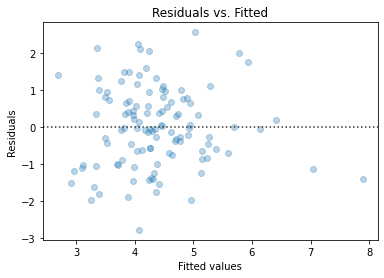

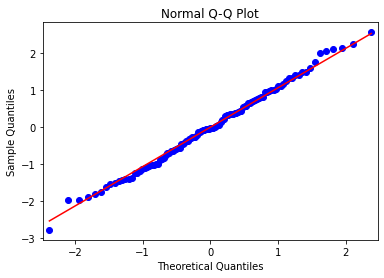


스튜던트화된 잔차들이: 
- 대략 0에 대해 대칭이며
- 설명변수(X축)에 따른 잔차의 산포가 크게 다르지 않고
- 점들이 특별한 형태를 띄지 않고있다.
- 정규 분위수 그래프를 그렸을 때, 잔차가 정규분포와 크게 다르지 않다.

$e_i \overset{	ext{iid}}{\sim} N(0, \sigma^2)$ 가정에 큰 문제가 없어보이므로, 단순선형회귀모형의 적용은 타당하다.

&nbsp;


In [18]:
display(md(r'''
$e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정이 타당한지 확인하기 위해, 잔차도를 그려 잔차분석을 해보자.
'''))

# Y_i = \hat y + \hat e
f = model3.fittedvalues # \hat y
r = model3.resid # \hat e

seaborn.residplot(x=f, y=r, data=data, scatter_kws={'alpha':0.3})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted values")
plt.show()

ProbPlot(r).qqplot(line='s', lw=1, fmt='b')
plt.title("Normal Q-Q Plot")
plt.show()

md('''
스튜던트화된 잔차들이: 
- 대략 0에 대해 대칭이며
- 설명변수(X축)에 따른 잔차의 산포가 크게 다르지 않고
- 점들이 특별한 형태를 띄지 않고있다.
- 정규 분위수 그래프를 그렸을 때, 잔차가 정규분포와 크게 다르지 않다.

$e_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ 가정에 큰 문제가 없어보이므로, 단순선형회귀모형의 적용은 타당하다.

&nbsp;
''')